In [6]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [7]:
# Load the dataset
dataset = pd.read_csv('energy_efficiency_data.csv')
dataset.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
# Data Preparation
# Handle missing values
dataset.dropna(inplace=True)
dataset.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


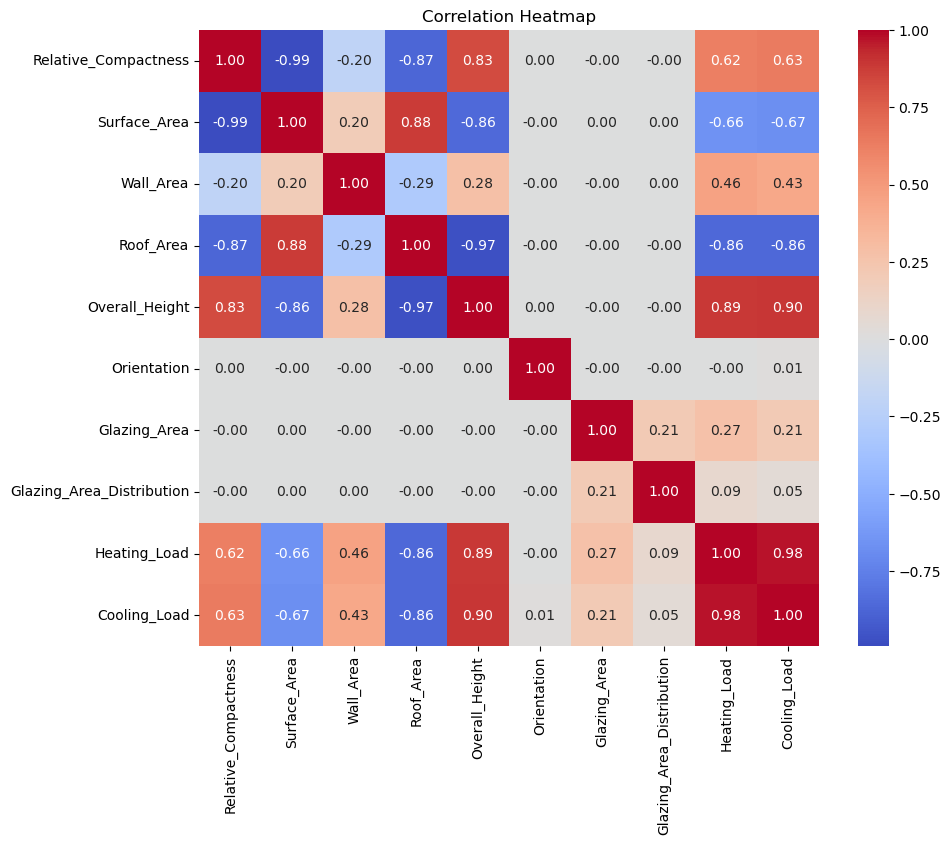

In [9]:
# Correlation heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Separate features and target variables
features = dataset.drop(['Heating_Load', 'Cooling_Load'], axis=1)
target_heating = dataset['Heating_Load']
target_cooling = dataset['Cooling_Load']

In [33]:
# Split the dataset into training and testing sets
features_train, features_test, target_heating_train, target_heating_test, target_cooling_train, target_cooling_test = \
    train_test_split(features, target_heating, target_cooling, test_size=0.2, random_state=42)

In [34]:
# Train machine learning models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}


Model: Linear Regression
Heating Load - RMSE: 3.023425877105941, R^2: 0.9123000276230969
Cooling Load - RMSE: 3.1530520410435523, R^2: 0.8927041479892717


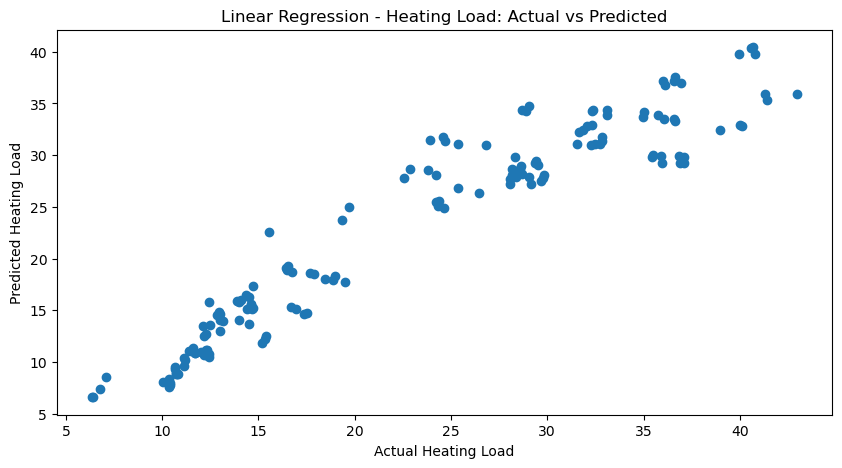

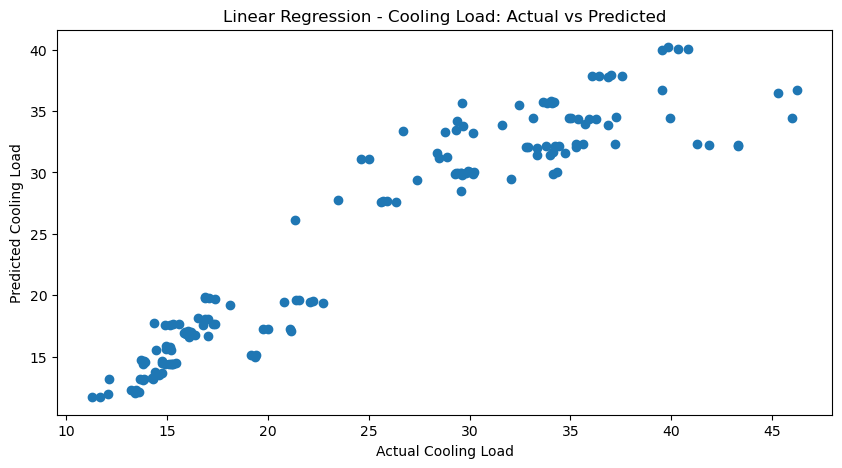


Model: Decision Tree
Heating Load - RMSE: 0.6206437797148229, R^2: 0.996304394377686
Cooling Load - RMSE: 2.0172243692371343, R^2: 0.9560833638701598


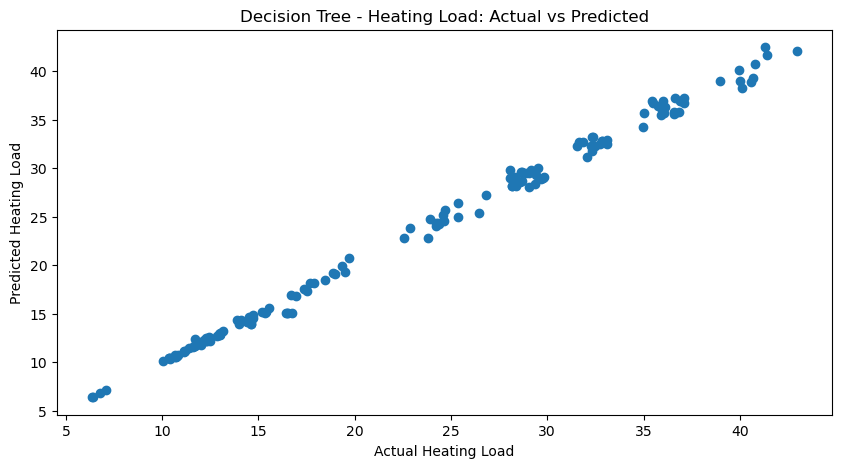

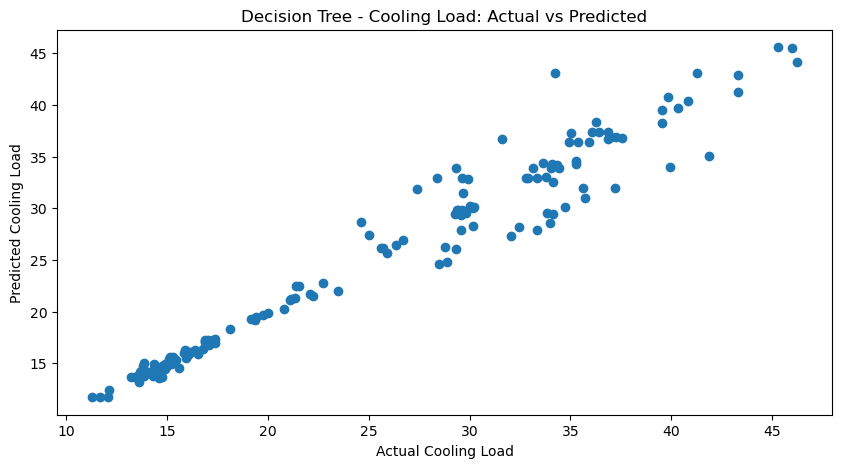


Model: Random Forest
Heating Load - RMSE: 0.49098222248081874, R^2: 0.9976872305615928
Cooling Load - RMSE: 1.7698531904593728, R^2: 0.9661938945943924


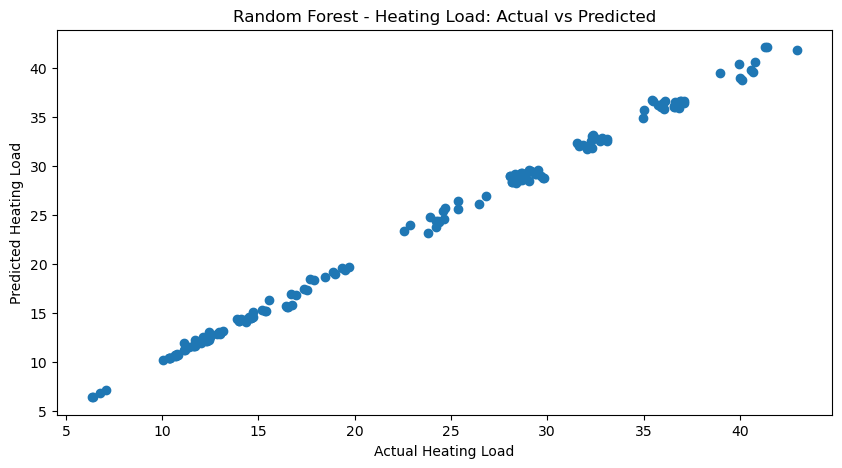

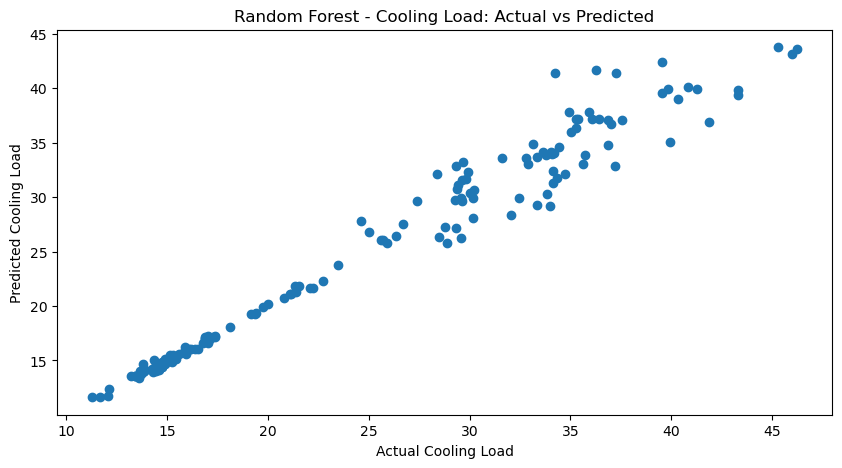

In [35]:
for name, model in models.items():
    # Train the model for Heating Load
    model.fit(features_train, target_heating_train)
    heating_predictions = model.predict(features_test)

    # Evaluate the model for Heating Load
    heating_rmse = mean_squared_error(target_heating_test, heating_predictions, squared=False)
    heating_r2 = r2_score(target_heating_test, heating_predictions)

    # Train the model for Cooling Load
    model.fit(features_train, target_cooling_train)
    cooling_predictions = model.predict(features_test)

    # Evaluate the model for Cooling Load
    cooling_rmse = mean_squared_error(target_cooling_test, cooling_predictions, squared=False)
    cooling_r2 = r2_score(target_cooling_test, cooling_predictions)

    # Display results
    print(f'\nModel: {name}')
    print(f'Heating Load - RMSE: {heating_rmse}, R^2: {heating_r2}')
    print(f'Cooling Load - RMSE: {cooling_rmse}, R^2: {cooling_r2}')

    # Plot actual vs predicted values for Heating Load
    plt.figure(figsize=(10, 5))
    plt.scatter(target_heating_test, heating_predictions)
    plt.title(f'{name} - Heating Load: Actual vs Predicted')
    plt.xlabel('Actual Heating Load')
    plt.ylabel('Predicted Heating Load')
    plt.show()

    # Plot actual vs predicted values for Cooling Load
    plt.figure(figsize=(10, 5))
    plt.scatter(target_cooling_test, cooling_predictions)
    plt.title(f'{name} - Cooling Load: Actual vs Predicted')
    plt.xlabel('Actual Cooling Load')
    plt.ylabel('Predicted Cooling Load')
    plt.show()
